In [11]:
import numpy as np
from numpy import *
import pandas as pd
import os
from seaborn import load_dataset
import csv
from pandas import read_csv, DataFrame
import time
from astroquery.jplhorizons import Horizons
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pyedra


path = os.getcwd()

plt.rcParams.update({'axes.labelsize': 15, 'axes.titlesize': 15, 
              'legend.fontsize':13, 'font.family': ['sans-serif'] })

In [12]:
df = read_csv(path+"/Datos_Sloan/svomoc.csv")
df

,#RA,DEC,dis,moID,Run,Col,Field,Object,rowc,colc,...,flag_55,flag_56,flag_57,flag_58,flag_59,flag_60,flag_61,flag_62,flag_63,flag_64
0,162.801416,-23.691684,104333.878628,sedffd,5999,3,17,792,1290.290,797.005,...,0,0,0,0,0,0,0,0,0,0
1,215.857215,-23.409661,151008.164610,sef89e,6174,1,271,541,709.488,801.964,...,0,0,0,0,0,0,0,0,0,0
2,10.876228,-23.385853,555617.233948,sf1b87,6413,4,135,142,1299.010,76.667,...,0,0,0,0,0,0,0,0,0,0
3,216.308853,-23.284644,152104.550926,sef9b0,6174,2,271,317,1331.730,873.687,...,0,0,0,0,0,0,0,0,0,0
4,9.410759,-23.271988,557984.545470,sf1a83,6413,1,131,70,123.288,1182.280,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277742,189.656945,-16.309597,67993.535344,sef348,6121,6,53,162,660.255,120.927,...,0,0,0,0,0,0,0,0,0,0
277743,1.618739,0.312104,642065.239833,s18949,2708,4,119,138,1007.100,1006.270,...,0,0,0,0,0,0,0,0,0,0
277744,2.210097,0.839620,639489.109039,s18f6e,2768,5,147,125,890.692,1975.810,...,0,0,0,0,0,0,0,0,0,0
277745,172.719787,7.556389,37721.496368,s1c370,3015,4,391,18,229.082,211.459,...,0,0,0,0,0,0,0,0,0,0


### Arreglar tabla de datos

Al renombrar columnas:

- Distancia al observador (G_dis) pasa a ser 'Delta' (como en JPL)
- Distancia heliocéntrica (R_dis) pasa a ser 'R' (como en JPL)
- 'G_Slope' a 'G' y 'Hmag' a 'H'

In [13]:
### Pasar a julian dates 
df['jd'] = df['mjd'] + 2400000.5

### Eliminar columnas 
df.drop(['#RA','DEC','dis','moID','Run','Col','Field','Object','rowc','colc',
         'vMu','vMu_err','vNu','vNu_err','vLambda','vBeta','Source','DetCoun',
         'TotDetCoun','Flags','comp_ra','comp_dec','comp_appmag','CatID','Arc',
         'Epoch','Lon_ascnod','Argper','M_orb','PcatID','aprime','eprime','siniprime',
         'flag_1','flag_1','flag_1','flag_1','flag_1','flag_1','flag_1','flag_2','flag_3',
         'flag_4','flag_5','flag_6','flag_7','flag_8','flag_9','flag_10','flag_11','flag_12',
         'flag_13','flag_14','flag_15','flag_16','flag_17','flag_18','flag_19','flag_20',
         'flag_21','flag_22','flag_23','flag_24','flag_25','flag_26','flag_27','flag_28',
         'flag_29','flag_30','flag_31','flag_32','flag_33','flag_34','flag_35','flag_36',
         'flag_37','flag_38','flag_39','flag_40','flag_41','flag_42','flag_43','flag_44',
         'flag_45','flag_46','flag_47','flag_48','flag_49','flag_50','flag_51','flag_52',
         'flag_53','flag_54','flag_55','flag_56','flag_57','flag_58','flag_59','flag_60',
         'flag_61','flag_62','flag_63','flag_64','Lambda', 'Beta', 'Phi','amag','amag_err','Bmag','mjd'], axis = 'columns', inplace=True)

### Eliminar filas con Number 0
df.drop(df[df['Number']==0].index, inplace = True)

### Eliminar filas duplicadas
df = df.drop_duplicates()

### Ordenar según número de asteoride y reindex
df = df.sort_values('Number')
df = df.reset_index()
df.drop(['index'], axis = 'columns', inplace=True)

### Renombar columnas
df.rename(columns={'G_dis': 'Delta','R_dis': 'R', 'G_slope': 'G','Hmag': 'H'}, inplace=True)

### Reordenar columnas
df = df.reindex(columns=['Name','Number','jd', 'umag', 'umag_err', 'gmag', 'gmag_err', 'rmag', 'rmag_err',
       'imag', 'imag_err', 'zmag', 'zmag_err', 'Vmag', 'a_orb', 'e_orb','i_orb', 'Delta','R','Phase', 'H', 'G', ])

df

,Name,Number,jd,umag,umag_err,gmag,gmag_err,rmag,rmag_err,imag,...,zmag_err,Vmag,a_orb,e_orb,i_orb,Delta,R,Phase,H,G
0,Rhodope,166,2.452346e+06,16.52,0.02,14.85,0.02,14.31,0.01,14.16,...,0.03,14.53,2.688697,0.210091,12.018931,2.222,3.157,7.33,9.89,0.15
1,Istria,183,2.453847e+06,17.56,0.03,15.88,0.01,15.22,0.01,15.02,...,0.01,15.49,2.792619,0.350221,26.382294,3.007,3.631,13.70,9.68,0.15
2,Lacrimosa,208,2.453110e+06,16.95,0.03,15.08,0.02,14.45,0.02,14.25,...,0.02,14.71,2.892914,0.015235,1.748925,2.528,2.852,20.36,8.96,0.15
3,Lacrimosa,208,2.453109e+06,16.70,0.01,16.28,0.01,14.27,0.01,14.06,...,0.02,15.13,2.892914,0.015235,1.748925,2.514,2.852,20.31,8.96,0.15
4,Stephania,220,2.451259e+06,17.65,0.03,16.14,0.02,15.64,0.02,15.44,...,0.02,15.84,2.348320,0.257785,7.586447,2.015,2.943,8.52,11.00,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147052,2014 QW418,415661,2.451963e+06,23.42,0.83,21.64,0.07,21.14,0.08,21.17,...,0.56,21.34,0.000000,0.000000,0.000000,0.000,0.000,0.00,0.00,0.00
147053,2014 RR9,415671,2.453303e+06,22.00,0.70,21.22,0.16,20.96,0.13,21.07,...,0.42,21.06,0.000000,0.000000,0.000000,0.000,0.000,0.00,0.00,0.00
147054,2014 RR9,415671,2.453315e+06,23.23,0.57,21.66,0.06,21.05,0.06,20.99,...,0.26,21.30,0.000000,0.000000,0.000000,0.000,0.000,0.00,0.00,0.00
147055,2014 RP16,415673,2.453273e+06,21.65,0.32,20.11,0.04,19.62,0.03,19.39,...,0.06,19.81,0.000000,0.000000,0.000000,0.000,0.000,0.00,0.00,0.00


### Agregar parámetros orbitales

- Semieje mayor (a)
- Inclinación (i)
- Excentricidad (e)

Solo para aquellos asteroides que no tienen aún dicha información

In [7]:
####################################        Parámetros orbitales        ####################################      
 
inicio = time.time()

number_before = 1

for i in range(len(df)):     
    if df.loc[i,'a_orb']==0:
        number = df['Number'].values[i]

        if number == number_before:
            df.loc[i,'a_orb'] = ast['a']
            df.loc[i,'e_orb'] = ast['e']
            df.loc[i,'i_orb'] = ast['incl']
            print(df.loc[i,['Number','a_orb','e_orb','i_orb']])

        else:
            ast = Horizons(id=number)  
            ast = ast.elements()
            df.loc[i,'a_orb'] = ast['a']
            df.loc[i,'e_orb'] = ast['e']
            df.loc[i,'i_orb'] = ast['incl']
            print(df.loc[i,['Number','a_orb','e_orb','i_orb']])
            
            number_before = number 
    
fin = time.time()
tiempo = fin-inicio
print('Tiempo de ejecución del programa (s):', tiempo)


Tiempo de ejecución del programa (s): 2.5641252994537354


### Plot inclinación vs semieje mayor


(1) Gráfico general 

(2) Gráfico hasta troyanos

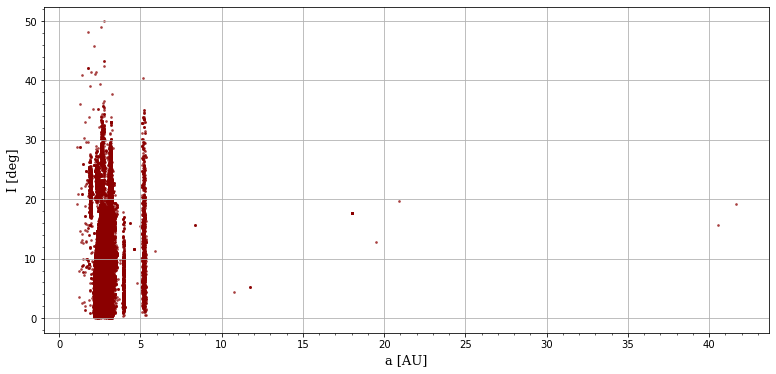

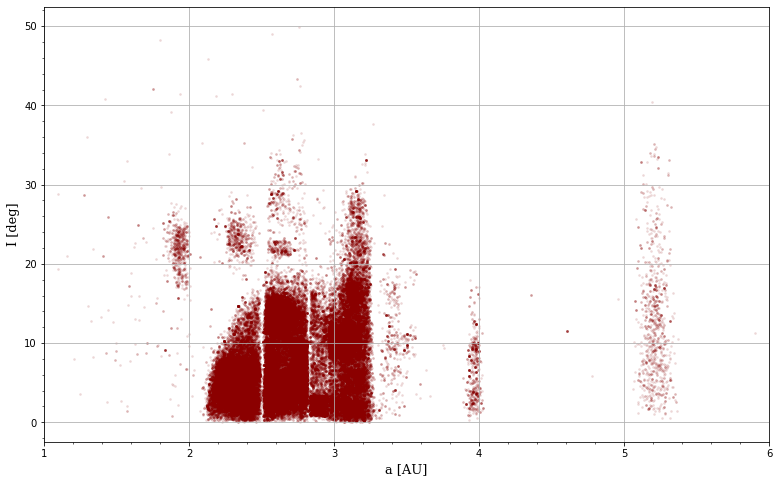

In [8]:
data = df.to_numpy()
i = data[:,16]
a = data[:,14]

fig, ax = plt.subplots(figsize=(13,6))
ax.scatter(a,i, s=3,alpha=0.6,color='darkred')
plt.xlabel(r'a [AU]', fontsize=13,fontfamily='serif'); plt.ylabel(r'I [deg]', fontsize=13,fontfamily='serif')
plt.minorticks_on()
plt.grid()

fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(a,i, s=3,alpha=0.1,color='darkred')
plt.xlabel(r'a [AU]', fontsize=13,fontfamily='serif'); plt.ylabel(r'I [deg]', fontsize=13,fontfamily='serif')
plt.xlim(1,6)
plt.minorticks_on()
plt.grid()
plt.show() 

### Seleccionar troyanos

En función del semieje mayor

In [ ]:
df.drop(df[df['a_orb'] > 5.6].index, inplace = True)
df.drop(df[df['a_orb'] < 4.8].index, inplace = True)
df

### Completar datos

Se completa la tabla con datos faltantes de:

- R, Delta y Phase
- H y G

In [ ]:
####################################          R, Delta, Phase         ####################################   

inicio = time.time()


for i in range(len(df)):
    if df.loc[i,'R']==0:
        number = df['Number'].values[i]
        jd = df['jd'].values[i]
        ast = Horizons(id=number, location='645', epochs=jd)   # Desde Sloan
        ast = ast.ephemerides()
        df.loc[i,'R_']=ast['r']
        df.loc[i,'Delta']=ast['delta']
        df.loc[i,'Phase']=ast['alpha']
        print(df_new.loc[i,['Number','R','Delta','Phase']])

fin = time.time()
tiempo = fin-inicio
print('Tiempo de ejecución del programa (s):', tiempo)


In [ ]:
####################################        Parámetros Función de fase        ####################################   

inicio = time.time()

number_before = 1
for i in range(len(df)):
    if df.loc[i,'H']==0:
        number = df['Number'].values[i]

        if number == number_before:
            df.loc[i,'Hm'] = ast['H']
            df.loc[i,'G'] = ast['G']
            print(df.loc[i,['Number','H','G']])
        
        else:
            ast = Horizons(id=number)  
            ast = ast.elements()
            df.loc[i,'H'] = ast['H']
            df.loc[i,'G'] = ast['G']
            print(df.loc[i,['Number','H','G']])

            number_before = number 

fin = time.time()
tiempo = fin-inicio
print('Tiempo de ejecución del programa (s):', tiempo)


### Determinar magnitudes

Se determinan las magnitudes reducidas como:

~~~
mag_red = mag - 5log(Delta·R)
~~~

Y la magnitud V (reducida):

~~~
V = g_mag - cte(g_mag - r_mag)
~~~

siendo cte = (0.52 + 0.58 + 0.59)/3

In [ ]:
arg=df['Delta']*df['R'].astype(float)

df.loc[:,'umag_red'] = df['umag'] - 5*np.log10(arg) 
df.loc[:,'gmag_red'] = df['gmag'] - 5*np.log10(arg) 
df.loc[:,'rmag_red'] = df['rmag'] - 5*np.log10(arg) 
df.loc[:,'imag_red'] = df['imag'] - 5*np.log10(arg) 
df.loc[:,'zmag_red'] = df['zmag'] - 5*np.log10(arg) 
    
    
df['V'] = df['gmag_red'] - cte*(df['gmag_red'] - df['rmag_red'])

### Cambiar parámetros orbitales

Se sustituyen por los de JPL Horizon para que coincidan con los datos que tenemos para Gaia (los parámetros en el MOC no son exactamente iguales)

In [80]:
inicio = time.time()

number_before = 1

for i in range(len(df)):     
    number = df['Number'].values[i]
    if number == number_before:
        df.loc[i,'a_orb'] = ast['a']
        df.loc[i,'e_orb'] = ast['e']
        df.loc[i,'i_orb'] = ast['incl']
        print(df.loc[i,['Number','a_orb','e_orb','i_orb']])
    else:
        ast = Horizons(id=number)  
        ast = ast.elements()
        df.loc[i,'a_orb'] = ast['a']
        df.loc[i,'e_orb'] = ast['e']
        df.loc[i,'i_orb'] = ast['incl']
        print(df.loc[i,['Number','a_orb','e_orb','i_orb']])
        
        number_before = number 
    
fin = time.time()
tiempo = fin-inicio
print('Tiempo de ejecución del programa (s):', tiempo)

Number         884
a_orb      5.19821
e_orb     0.125432
i_orb      8.90542
Name: 0, dtype: object
Number       1749
a_orb     5.14157
e_orb     0.10925
i_orb      6.0986
Name: 1, dtype: object
Number       1749
a_orb     5.14157
e_orb     0.10925
i_orb      6.0986
Name: 2, dtype: object
Number         1867
a_orb        5.1349
e_orb     0.0462542
i_orb        26.901
Name: 3, dtype: object
Number         1867
a_orb        5.1349
e_orb     0.0462542
i_orb        26.901
Name: 4, dtype: object
Number         1870
a_orb       5.24255
e_orb     0.0338743
i_orb       6.57784
Name: 5, dtype: object
Number        1872
a_orb      5.32261
e_orb     0.049678
i_orb      14.6406
Name: 6, dtype: object
Number        1872
a_orb      5.32261
e_orb     0.049678
i_orb      14.6406
Name: 7, dtype: object
Number        2260
a_orb       5.1992
e_orb     0.045259
i_orb      17.7753
Name: 8, dtype: object
Number         2357
a_orb       5.22473
e_orb     0.0474093
i_orb       2.66868
Name: 9, dtype: object
Nu

Number        11554
a_orb       5.28348
e_orb     0.0651629
i_orb       13.7028
Name: 81, dtype: object
Number        11554
a_orb       5.28348
e_orb     0.0651629
i_orb       13.7028
Name: 82, dtype: object
Number        11554
a_orb       5.28348
e_orb     0.0651629
i_orb       13.7028
Name: 83, dtype: object
Number        11869
a_orb       5.23177
e_orb     0.0433293
i_orb       11.3093
Name: 84, dtype: object
Number        11869
a_orb       5.23177
e_orb     0.0433293
i_orb       11.3093
Name: 85, dtype: object
Number        11869
a_orb       5.23177
e_orb     0.0433293
i_orb       11.3093
Name: 86, dtype: object
Number        11869
a_orb       5.23177
e_orb     0.0433293
i_orb       11.3093
Name: 87, dtype: object
Number       13331
a_orb      5.07443
e_orb     0.109901
i_orb      2.29626
Name: 88, dtype: object
Number        13362
a_orb       5.17801
e_orb     0.0281481
i_orb       9.34217
Name: 89, dtype: object
Number        13387
a_orb       5.20335
e_orb     0.0966667
i_orb   

Number      23152
a_orb     5.21618
e_orb      0.1517
i_orb     11.4304
Name: 161, dtype: object
Number      23382
a_orb      5.2243
e_orb     0.10583
i_orb     15.0347
Name: 162, dtype: object
Number      23382
a_orb      5.2243
e_orb     0.10583
i_orb     15.0347
Name: 163, dtype: object
Number        23549
a_orb       5.26832
e_orb     0.0441511
i_orb       9.04382
Name: 164, dtype: object
Number        23706
a_orb       5.24516
e_orb     0.0913253
i_orb       6.79989
Name: 165, dtype: object
Number        23939
a_orb       5.09597
e_orb     0.0432498
i_orb       9.92529
Name: 166, dtype: object
Number        23963
a_orb       5.20719
e_orb     0.0897483
i_orb        4.1338
Name: 167, dtype: object
Number        24018
a_orb       5.23391
e_orb     0.0496156
i_orb       15.7863
Name: 168, dtype: object
Number        24018
a_orb       5.23391
e_orb     0.0496156
i_orb       15.7863
Name: 169, dtype: object
Number        24018
a_orb       5.23391
e_orb     0.0496156
i_orb       15.7863

Number        35272
a_orb       5.17805
e_orb     0.0778266
i_orb       17.5892
Name: 241, dtype: object
Number        35272
a_orb       5.17805
e_orb     0.0778266
i_orb       17.5892
Name: 242, dtype: object
Number        36259
a_orb       5.21487
e_orb     0.0931162
i_orb       18.8927
Name: 243, dtype: object
Number        36271
a_orb       5.19402
e_orb     0.0507294
i_orb       11.7367
Name: 244, dtype: object
Number       36279
a_orb      5.31375
e_orb     0.101159
i_orb      31.1494
Name: 245, dtype: object
Number       36279
a_orb      5.31375
e_orb     0.101159
i_orb      31.1494
Name: 246, dtype: object
Number        36425
a_orb       5.17898
e_orb     0.0778284
i_orb       6.22057
Name: 247, dtype: object
Number        36922
a_orb       5.27309
e_orb     0.0441084
i_orb       10.3854
Name: 248, dtype: object
Number        37710
a_orb       5.22638
e_orb     0.0810689
i_orb       9.56046
Name: 249, dtype: object
Number        38052
a_orb       5.22052
e_orb     0.0361815
i_o

Number        53477
a_orb       5.28857
e_orb     0.0323205
i_orb       11.0258
Name: 321, dtype: object
Number        54582
a_orb       5.16594
e_orb     0.0877508
i_orb       2.89247
Name: 322, dtype: object
Number        54596
a_orb       5.08119
e_orb     0.0735915
i_orb       5.35091
Name: 323, dtype: object
Number        54596
a_orb       5.08119
e_orb     0.0735915
i_orb       5.35091
Name: 324, dtype: object
Number        54596
a_orb       5.08119
e_orb     0.0735915
i_orb       5.35091
Name: 325, dtype: object
Number       54646
a_orb      5.23697
e_orb     0.109557
i_orb      3.56173
Name: 326, dtype: object
Number       54646
a_orb      5.23697
e_orb     0.109557
i_orb      3.56173
Name: 327, dtype: object
Number       54646
a_orb      5.23697
e_orb     0.109557
i_orb      3.56173
Name: 328, dtype: object
Number        54653
a_orb       5.23238
e_orb     0.0526954
i_orb       16.4655
Name: 329, dtype: object
Number        54653
a_orb       5.23238
e_orb     0.0526954
i_orb  

Number        73677
a_orb       5.29078
e_orb     0.0539708
i_orb       17.6274
Name: 400, dtype: object
Number        73795
a_orb       5.17606
e_orb     0.0621278
i_orb       22.4911
Name: 401, dtype: object
Number        73795
a_orb       5.17606
e_orb     0.0621278
i_orb       22.4911
Name: 402, dtype: object
Number        76804
a_orb       5.12857
e_orb     0.0642095
i_orb       9.59079
Name: 403, dtype: object
Number       76812
a_orb        5.188
e_orb     0.108351
i_orb      14.7845
Name: 404, dtype: object
Number       76812
a_orb        5.188
e_orb     0.108351
i_orb      14.7845
Name: 405, dtype: object
Number       76812
a_orb        5.188
e_orb     0.108351
i_orb      14.7845
Name: 406, dtype: object
Number       76812
a_orb        5.188
e_orb     0.108351
i_orb      14.7845
Name: 407, dtype: object
Number       76812
a_orb        5.188
e_orb     0.108351
i_orb      14.7845
Name: 408, dtype: object
Number        76820
a_orb       5.20747
e_orb     0.0937034
i_orb       18.

Number      107804
a_orb      5.29865
e_orb     0.033046
i_orb      6.92915
Name: 484, dtype: object
Number      107804
a_orb      5.29865
e_orb     0.033046
i_orb      6.92915
Name: 485, dtype: object
Number       109549
a_orb       5.18092
e_orb     0.0790898
i_orb       22.3379
Name: 486, dtype: object
Number       110359
a_orb       5.25495
e_orb     0.0866957
i_orb       3.43941
Name: 487, dtype: object
Number       110380
a_orb       5.20674
e_orb     0.0872839
i_orb       22.6527
Name: 488, dtype: object
Number       110829
a_orb         5.246
e_orb     0.0209571
i_orb       4.75315
Name: 489, dtype: object
Number      110832
a_orb      5.19773
e_orb     0.027662
i_orb      1.42916
Name: 490, dtype: object
Number       110859
a_orb       5.18595
e_orb     0.0749109
i_orb       3.22507
Name: 491, dtype: object
Number       111198
a_orb       5.18763
e_orb     0.0707241
i_orb        1.1029
Name: 492, dtype: object
Number      111785
a_orb      5.05666
e_orb     0.059727
i_orb     

Number       151883
a_orb       5.13242
e_orb     0.0445391
i_orb       5.52612
Name: 564, dtype: object
Number       152297
a_orb       5.13061
e_orb     0.0659192
i_orb       13.0435
Name: 565, dtype: object
Number       152297
a_orb       5.13061
e_orb     0.0659192
i_orb       13.0435
Name: 566, dtype: object
Number       152297
a_orb       5.13061
e_orb     0.0659192
i_orb       13.0435
Name: 567, dtype: object
Number       152297
a_orb       5.13061
e_orb     0.0659192
i_orb       13.0435
Name: 568, dtype: object
Number       153500
a_orb       5.10404
e_orb     0.0235643
i_orb       15.6976
Name: 569, dtype: object
Number       153500
a_orb       5.10404
e_orb     0.0235643
i_orb       15.6976
Name: 570, dtype: object
Number      153708
a_orb      5.16397
e_orb     0.113552
i_orb      9.19191
Name: 571, dtype: object
Number      153758
a_orb      5.26346
e_orb     0.032961
i_orb      4.10549
Name: 572, dtype: object
Number       154990
a_orb       5.22896
e_orb     0.0838434
i_o

Number       187471
a_orb       5.26128
e_orb     0.0675586
i_orb       8.34696
Name: 643, dtype: object
Number       187692
a_orb       5.21949
e_orb     0.0187634
i_orb       27.3045
Name: 644, dtype: object
Number       187755
a_orb       5.26889
e_orb     0.0991723
i_orb       4.62282
Name: 645, dtype: object
Number       187755
a_orb       5.26889
e_orb     0.0991723
i_orb       4.62282
Name: 646, dtype: object
Number       188060
a_orb       5.17088
e_orb     0.0270119
i_orb        11.084
Name: 647, dtype: object
Number       188247
a_orb       5.22077
e_orb     0.0553554
i_orb       6.84728
Name: 648, dtype: object
Number       188257
a_orb       5.19861
e_orb     0.0357241
i_orb       15.6193
Name: 649, dtype: object
Number       188257
a_orb       5.19861
e_orb     0.0357241
i_orb       15.6193
Name: 650, dtype: object
Number       188257
a_orb       5.19861
e_orb     0.0357241
i_orb       15.6193
Name: 651, dtype: object
Number       188257
a_orb       5.19861
e_orb     0.035

Number       257376
a_orb       5.17111
e_orb     0.0543438
i_orb       5.20237
Name: 722, dtype: object
Number       257406
a_orb       5.12873
e_orb     0.0622485
i_orb       4.75614
Name: 723, dtype: object
Number       257406
a_orb       5.12873
e_orb     0.0622485
i_orb       4.75614
Name: 724, dtype: object
Number      257415
a_orb      5.22519
e_orb     0.044944
i_orb      1.82866
Name: 725, dtype: object
Number       257486
a_orb       5.33047
e_orb     0.0464817
i_orb       4.41658
Name: 726, dtype: object
Number       257775
a_orb       5.26023
e_orb     0.0995186
i_orb       4.23058
Name: 727, dtype: object
Number       259342
a_orb       5.20368
e_orb     0.0687993
i_orb       12.6221
Name: 728, dtype: object
Number       259360
a_orb       5.24011
e_orb     0.0742358
i_orb       7.04773
Name: 729, dtype: object
Number       261781
a_orb       5.21163
e_orb     0.0434071
i_orb       18.8914
Name: 730, dtype: object
Number      261791
a_orb      5.22905
e_orb     0.063841
i_

Number       295315
a_orb       5.18796
e_orb     0.0525041
i_orb       29.6645
Name: 802, dtype: object
Number       295315
a_orb       5.18796
e_orb     0.0525041
i_orb       29.6645
Name: 803, dtype: object
Number       295329
a_orb       5.20004
e_orb     0.0443454
i_orb       10.2645
Name: 804, dtype: object
Number       295329
a_orb       5.20004
e_orb     0.0443454
i_orb       10.2645
Name: 805, dtype: object
Number       295329
a_orb       5.20004
e_orb     0.0443454
i_orb       10.2645
Name: 806, dtype: object
Number        295336
a_orb        5.18439
e_orb     0.00531934
i_orb        18.0956
Name: 807, dtype: object
Number        295336
a_orb        5.18439
e_orb     0.00531934
i_orb        18.0956
Name: 808, dtype: object
Number       295340
a_orb       5.27206
e_orb     0.0279154
i_orb       23.2964
Name: 809, dtype: object
Number       295340
a_orb       5.27206
e_orb     0.0279154
i_orb       23.2964
Name: 810, dtype: object
Number       295342
a_orb       5.30059
e_orb  

Number       315926
a_orb        5.3693
e_orb     0.0956308
i_orb       10.5466
Name: 881, dtype: object
Number       315933
a_orb       5.14522
e_orb     0.0502009
i_orb       7.67867
Name: 882, dtype: object
Number       315949
a_orb       5.19113
e_orb     0.0352971
i_orb       6.08922
Name: 883, dtype: object
Number       315951
a_orb       5.36657
e_orb     0.0880763
i_orb       1.39817
Name: 884, dtype: object
Number      315958
a_orb      5.26962
e_orb     0.145028
i_orb       12.477
Name: 885, dtype: object
Number      316085
a_orb       5.2307
e_orb     0.154941
i_orb      10.0705
Name: 886, dtype: object
Number       316135
a_orb        5.2287
e_orb     0.0994038
i_orb       3.11266
Name: 887, dtype: object
Number       316149
a_orb       5.33914
e_orb     0.0622435
i_orb       8.73406
Name: 888, dtype: object
Number       316157
a_orb       5.28254
e_orb     0.0820685
i_orb       6.14428
Name: 889, dtype: object
Number       316160
a_orb       5.33787
e_orb     0.0895275
i_o

Number      343977
a_orb      5.25122
e_orb     0.078279
i_orb      7.67344
Name: 963, dtype: object
Number      343994
a_orb      5.24125
e_orb     0.075632
i_orb      3.62831
Name: 964, dtype: object
Number      343994
a_orb      5.24125
e_orb     0.075632
i_orb      3.62831
Name: 965, dtype: object
Number       344003
a_orb       5.27047
e_orb     0.0634975
i_orb        9.3445
Name: 966, dtype: object
Number       347299
a_orb        5.2137
e_orb     0.0657021
i_orb       13.0334
Name: 967, dtype: object
Number       350059
a_orb        5.0701
e_orb     0.0362937
i_orb       9.67526
Name: 968, dtype: object
Number       353197
a_orb       5.07372
e_orb     0.0375109
i_orb       6.40623
Name: 969, dtype: object
Number       353362
a_orb       5.11298
e_orb     0.0950574
i_orb       10.0985
Name: 970, dtype: object
Number       354342
a_orb       5.19372
e_orb     0.0325333
i_orb       6.48021
Name: 971, dtype: object
Number       354342
a_orb       5.19372
e_orb     0.0325333
i_orb  

Number       393156
a_orb       5.18036
e_orb     0.0374586
i_orb       11.0627
Name: 1042, dtype: object
Number       393170
a_orb       5.28644
e_orb     0.0370771
i_orb        9.9492
Name: 1043, dtype: object
Number      393200
a_orb       5.2032
e_orb     0.105837
i_orb      12.4465
Name: 1044, dtype: object
Number      393211
a_orb      5.19385
e_orb     0.112016
i_orb      4.51466
Name: 1045, dtype: object
Number       394821
a_orb       5.23167
e_orb     0.0749413
i_orb       10.4123
Name: 1046, dtype: object
Number      396158
a_orb      5.19921
e_orb     0.075203
i_orb      4.37201
Name: 1047, dtype: object
Number       396412
a_orb       5.24926
e_orb     0.0710027
i_orb       9.70974
Name: 1048, dtype: object
Number       399120
a_orb        5.1029
e_orb     0.0973782
i_orb       18.5487
Name: 1049, dtype: object
Number       412394
a_orb       5.14932
e_orb     0.0633655
i_orb       27.2635
Name: 1050, dtype: object
Number       412394
a_orb       5.14932
e_orb     0.063365

Se guardan los datos de los troyanos de Sloan

In [81]:
df.to_csv(path+"/Datos_Sloan/SDSS_trojans.csv",index=False)

## Análisis

### En relación a magnitudes reducidas

In [ ]:
df_trojans = read_csv(path+"/Datos_Sloan/SDSS_trojans.csv")

C:\Users\saruk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\saruk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\saruk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

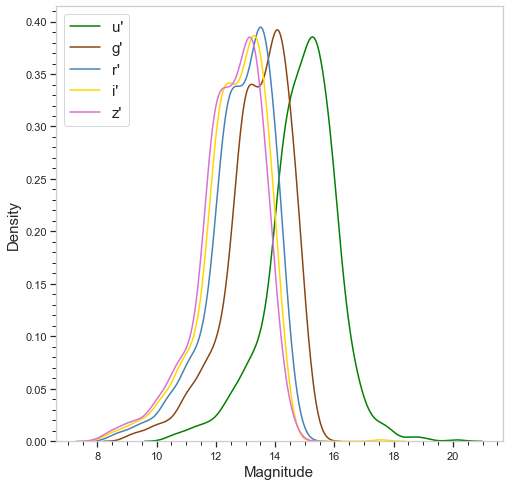

In [10]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(8,8))
g = sns.distplot(x=df_trojans["umag_red"], bins=50, 
             color='green',  hist=False,
             label="u'", kde=True)
sns.distplot(x=df_trojans["gmag_red"], bins=50, 
             color='saddlebrown',  hist=False,
             label="g'", kde=True)
sns.distplot(x=df_trojans["rmag_red"], bins=50, 
             color='steelblue', hist=False,
             label="r'", kde=True)
sns.distplot(x=df_trojans["imag_red"], bins=50, 
             color='gold',   hist=False,
             label="i'", kde=True)
sns.distplot(x=df_trojans["zmag_red"], bins=50, 
             color='orchid',   hist=False,
             label="z'", kde=True)

g.set_xlabel("Magnitude", fontsize = 15)
g.set_ylabel("Density", fontsize = 15)
plt.legend(loc='upper left', fontsize=15)

plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)


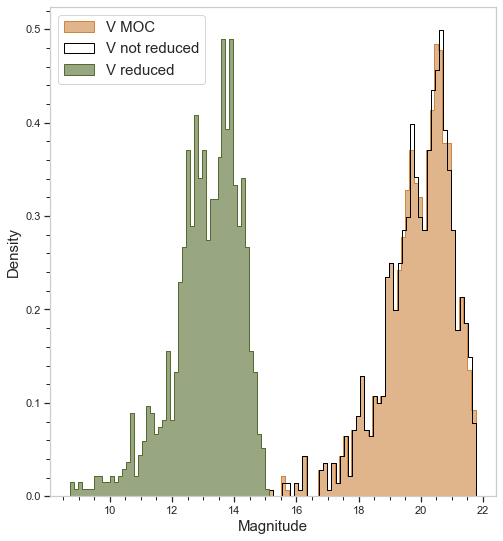

In [5]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(8,9))

g=sns.histplot(data=df_trojans, x="Vmag", bins=50, 
             color='peru', alpha=0.6, 
             element='step',stat="density", common_norm=False, label='V MOC')

#
df_trojans['V_wo_red'] = df_trojans.loc[:,'gmag'] -  (0.52 + 0.58 + 0.59)/3*(df_trojans.loc[:,'gmag'] - df_trojans.loc[:,'rmag'])
sns.histplot(data=df_trojans, x="V_wo_red", bins=50, 
             color='black', alpha=0.0,  
             element='step',stat="density", common_norm=False, label='V not reduced')
#

sns.histplot(data=df_trojans, x="V", bins=50, 
             color='darkolivegreen', alpha=0.6,  
             element='step',stat="density", common_norm=False, label='V reduced')


g.set_xlabel("Magnitude", fontsize = 15)
g.set_ylabel("Density", fontsize = 15)
plt.legend(loc='upper left', fontsize=15)

plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)


##### Test Kolmogorov-Smirnov

In [6]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp


# Test Kolmogorov–Smirnov entre dos muestras
# ==============================================================================
ks_2samp(
    df_trojans.loc[:,'Vmag'],
    df_trojans.loc[:,'V_wo_red']
)



KstestResult(statistic=0.016113744075829384, pvalue=0.9991807125876462)

### En relación a magnitudes absolutas

In [ ]:
df_trojans.rename(columns={'Number': 'id','Phase':'alpha'}, inplace=True)

# Eliminar asteroides con menos de N observaciones
N = 3
a = pd.unique(df_trojans['id'])
a.sort()
index2 = []
for i in a:
    df_i = df_trojans.loc[df_trojans.loc[:, 'id'] == i]
    if len(df_i) < N:
        ind = df_i.index
        index2 = np.append(index2, ind[:], axis=0)  
index2 = np.array(index2)
df_trojans = df_trojans.drop(index2 , axis='rows')

# Elimino la observación que tiene magnitudes grandes
df_trojans.drop(df_trojans[df_trojans['zmag_red']>20].index, inplace = True)

# Determinar Hu, Hg, Hr, Hi, Hz 
HG_u = pyedra.HG_fit(df_trojans, idc="id", alphac="alpha", magc="umag_red")
HG_g = pyedra.HG_fit(df_trojans, idc="id", alphac="alpha", magc="gmag_red")
HG_r = pyedra.HG_fit(df_trojans, idc="id", alphac="alpha", magc="rmag_red")
HG_i = pyedra.HG_fit(df_trojans, idc="id", alphac="alpha", magc="imag_red")
HG_z = pyedra.HG_fit(df_trojans, idc="id", alphac="alpha", magc="zmag_red")

#### Gráfico color-color

(H_i - H_z) vs (H_g - H_i)     

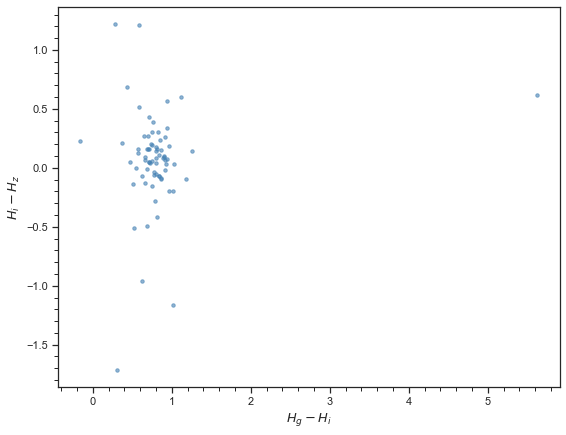

In [2]:
sns.set_theme(style="ticks")

HiHz = HG_i.loc[:,'H'] - HG_z.loc[:,'H']
HgHi = HG_g.loc[:,'H'] - HG_i.loc[:,'H']

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(HgHi,HiHz, s=12,alpha=0.6, color ='steelblue')
plt.ylabel(r"$H_i-H_z$", fontsize=13,fontfamily='serif')
plt.xlabel( r"$H_g-H_i$", fontsize=13,fontfamily='serif')
plt.minorticks_on()

#### Reflectancia relativa 

Flujos vs longitud de onda

Text(0.5, 0, '$\\lambda [\\AA]$')

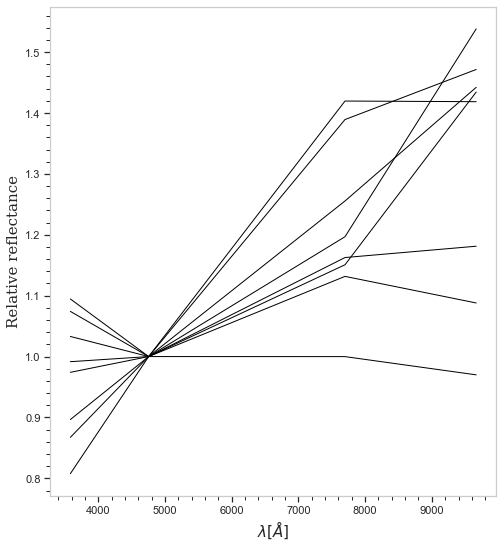

In [4]:
sns.set_theme(style="whitegrid")

lambda_u = 3580
lambda_g = 4754
lambda_r = 6204
lambda_i = 7698
lambda_z = 9665


## Referencia g

g = 5.12
ug = +1.43
rg = 4.68 - 5.12 
ig = 4.57 - 5.12
zg = 4.54 - 5.12

F_r = 10**(-0.4*(HG_r.loc[3:11,'H']-HG_g.loc[3:11,'H']-rg))
F_r = F_r/F_r
F_u = 10**(-0.4*(HG_u.loc[3:11,'H']-HG_g.loc[3:11,'H']-ug))/F_r
F_i = 10**(-0.4*(HG_i.loc[3:11,'H']-HG_g.loc[3:11,'H']-ig))/F_r
F_z = 10**(-0.4*(HG_z.loc[3:11,'H']-HG_g.loc[3:11,'H']-zg))/F_r
# 3:11 en el plot del paper

y = np.array([F_u,F_r,F_i,F_z])
x = np.array([lambda_u,lambda_g,lambda_i,lambda_z])

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(x, y, c='black', linewidth=1)
plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)
plt.ylabel('Relative reflectance', fontsize=15,fontfamily='serif')
plt.xlabel(r'$\lambda [\AA]$', fontsize=15,fontfamily='serif')


## El 2 es el malo

Reflectances usando las magnitudes reducidas, no absolutas

Text(0.5, 0, '$\\lambda [\\AA]$')

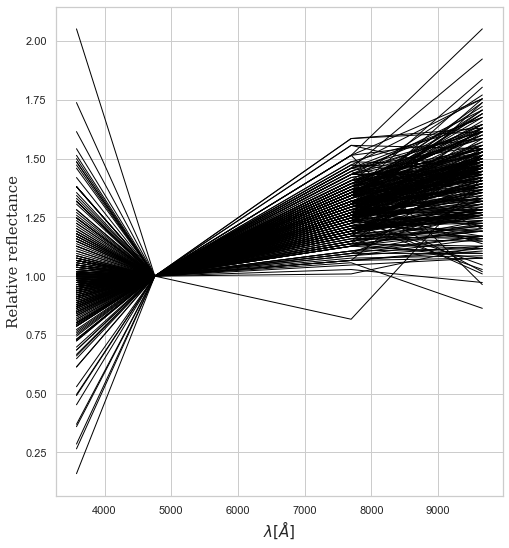

In [6]:
F_r = 10**(-0.4*(df_trojans.loc[:,'rmag_red']-df_trojans.loc[:,'gmag_red']-rg))
F_r = F_r/F_r
F_u = 10**(-0.4*(df_trojans.loc[:,'umag_red']-df_trojans.loc[:,'gmag_red']-ug))/F_r
F_i = 10**(-0.4*(df_trojans.loc[:,'imag_red']-df_trojans.loc[:,'gmag_red']-ig))/F_r
F_z = 10**(-0.4*(df_trojans.loc[:,'zmag_red']-df_trojans.loc[:,'gmag_red']-zg))/F_r

y = np.array([F_u,F_r,F_i,F_z])
x = np.array([lambda_u,lambda_g,lambda_i,lambda_z])

fig, ax = plt.subplots(figsize=(8,9))
plt.plot(x, y, c='black', linewidth=1)
plt.grid(True)
plt.ylabel('Relative reflectance', fontsize=15,fontfamily='serif')
plt.xlabel(r'$\lambda [\AA]$', fontsize=15,fontfamily='serif')
